In [2]:
# Make module from local packages importable
import os
import sys
os.chdir("/home/mhoerold/entrack")

In [20]:
from src.baum_vagan.vagan.model_wrapper import VAGanWrapper
from src.baum_vagan.utils import map_image_to_intensity_range
import yaml
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

## Define some constants

In [4]:
smt_label = "20180801-155215"
config_path = os.path.join("data", smt_label, "config.yaml")
model_dir = os.path.join("data", smt_label, "logdir")
with open(config_path, 'r') as f:
    model_config = yaml.load(f)

In [5]:
model_config

{'batch_size': 32,
 'beta1': 0.0,
 'beta2': 0.9,
 'clip_max': 0.01,
 'clip_min': -0.01,
 'condition_on_delta_x': True,
 'conditioned_gan': True,
 'critic_initial_train_duration': 25,
 'critic_iter': 5,
 'critic_iter_long': 100,
 'critic_net': 'src.baum_vagan.vagan.network_zoo.nets2D.critics.C3D_fcn_16_2D_conditioned_with_delta',
 'critic_retune_frequency': 100,
 'data_identifier': 'synthetic',
 'data_loader': 'src.data.synthetic.loader.CN_AD_Loader',
 'divide_lr_frequency': 'None',
 'experiment_name': 'synth_vagan',
 'generate_diff_map': False,
 'generator_net': 'src.baum_vagan.vagan.network_zoo.nets2D.mask_generators.unet_16_2D_bn',
 'image_size': [112, 112],
 'improved_training': True,
 'input_wrapper': 'src.baum_vagan.vagan.model_vagan.Xt0_DT_DXt0',
 'l1_map_weight': 100.0,
 'learning_rate': '1e-4',
 'max_iterations': 5000,
 'moving_effect': True,
 'n_accum_grads': 1,
 'n_channels': 3,
 'num_val_batches': 20,
 'optimizer_handle': 'tensorflow.train.AdamOptimizer',
 'preproc_folder': 

In [6]:
wrapper = VAGanWrapper(**model_config)

INFO:tensorflow:Summary name generator/conv1_1/conv1_1_conv/W:0 is illegal; using generator/conv1_1/conv1_1_conv/W_0 instead.


2018-08-09 08:10:51,392 Summary name generator/conv1_1/conv1_1_conv/W:0 is illegal; using generator/conv1_1/conv1_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv1_2/conv1_2_conv/W:0 is illegal; using generator/conv1_2/conv1_2_conv/W_0 instead.


2018-08-09 08:10:51,431 Summary name generator/conv1_2/conv1_2_conv/W:0 is illegal; using generator/conv1_2/conv1_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv2_1/conv2_1_conv/W:0 is illegal; using generator/conv2_1/conv2_1_conv/W_0 instead.


2018-08-09 08:10:51,470 Summary name generator/conv2_1/conv2_1_conv/W:0 is illegal; using generator/conv2_1/conv2_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv2_2/conv2_2_conv/W:0 is illegal; using generator/conv2_2/conv2_2_conv/W_0 instead.


2018-08-09 08:10:51,508 Summary name generator/conv2_2/conv2_2_conv/W:0 is illegal; using generator/conv2_2/conv2_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv3_1/conv3_1_conv/W:0 is illegal; using generator/conv3_1/conv3_1_conv/W_0 instead.


2018-08-09 08:10:51,546 Summary name generator/conv3_1/conv3_1_conv/W:0 is illegal; using generator/conv3_1/conv3_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv3_2/conv3_2_conv/W:0 is illegal; using generator/conv3_2/conv3_2_conv/W_0 instead.


2018-08-09 08:10:51,583 Summary name generator/conv3_2/conv3_2_conv/W:0 is illegal; using generator/conv3_2/conv3_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv4_1/conv4_1_conv/W:0 is illegal; using generator/conv4_1/conv4_1_conv/W_0 instead.


2018-08-09 08:10:51,623 Summary name generator/conv4_1/conv4_1_conv/W:0 is illegal; using generator/conv4_1/conv4_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv4_2/conv4_2_conv/W:0 is illegal; using generator/conv4_2/conv4_2_conv/W_0 instead.


2018-08-09 08:10:51,656 Summary name generator/conv4_2/conv4_2_conv/W:0 is illegal; using generator/conv4_2/conv4_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/upconv3/W:0 is illegal; using generator/upconv3/W_0 instead.


2018-08-09 08:10:51,694 Summary name generator/upconv3/W:0 is illegal; using generator/upconv3/W_0 instead.


[ 0  0 24]
INFO:tensorflow:Summary name generator/conv5_1/conv5_1_conv/W:0 is illegal; using generator/conv5_1/conv5_1_conv/W_0 instead.


2018-08-09 08:10:51,733 Summary name generator/conv5_1/conv5_1_conv/W:0 is illegal; using generator/conv5_1/conv5_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv5_2/conv5_2_conv/W:0 is illegal; using generator/conv5_2/conv5_2_conv/W_0 instead.


2018-08-09 08:10:51,764 Summary name generator/conv5_2/conv5_2_conv/W:0 is illegal; using generator/conv5_2/conv5_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/upconv2/W:0 is illegal; using generator/upconv2/W_0 instead.


2018-08-09 08:10:51,799 Summary name generator/upconv2/W:0 is illegal; using generator/upconv2/W_0 instead.


[0 0 8]
INFO:tensorflow:Summary name generator/conv6_1/conv6_1_conv/W:0 is illegal; using generator/conv6_1/conv6_1_conv/W_0 instead.


2018-08-09 08:10:51,834 Summary name generator/conv6_1/conv6_1_conv/W:0 is illegal; using generator/conv6_1/conv6_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv6_2/conv6_2_conv/W:0 is illegal; using generator/conv6_2/conv6_2_conv/W_0 instead.


2018-08-09 08:10:51,873 Summary name generator/conv6_2/conv6_2_conv/W:0 is illegal; using generator/conv6_2/conv6_2_conv/W_0 instead.


INFO:tensorflow:Summary name generator/upconv1/W:0 is illegal; using generator/upconv1/W_0 instead.


2018-08-09 08:10:51,908 Summary name generator/upconv1/W:0 is illegal; using generator/upconv1/W_0 instead.


[0 0 0]
INFO:tensorflow:Summary name generator/conv8_1/conv8_1_conv/W:0 is illegal; using generator/conv8_1/conv8_1_conv/W_0 instead.


2018-08-09 08:10:51,942 Summary name generator/conv8_1/conv8_1_conv/W:0 is illegal; using generator/conv8_1/conv8_1_conv/W_0 instead.


INFO:tensorflow:Summary name generator/conv8_2/W:0 is illegal; using generator/conv8_2/W_0 instead.


2018-08-09 08:10:52,018 Summary name generator/conv8_2/W:0 is illegal; using generator/conv8_2/W_0 instead.


INFO:tensorflow:Summary name generator/conv8_2/b:0 is illegal; using generator/conv8_2/b_0 instead.


2018-08-09 08:10:52,020 Summary name generator/conv8_2/b:0 is illegal; using generator/conv8_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


2018-08-09 08:10:52,038 Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


2018-08-09 08:10:52,040 Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


2018-08-09 08:10:52,051 Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


2018-08-09 08:10:52,053 Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


2018-08-09 08:10:52,066 Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


2018-08-09 08:10:52,067 Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


2018-08-09 08:10:52,077 Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


2018-08-09 08:10:52,079 Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


2018-08-09 08:10:52,089 Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


2018-08-09 08:10:52,091 Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


2018-08-09 08:10:52,101 Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


2018-08-09 08:10:52,103 Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


2018-08-09 08:10:52,113 Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


2018-08-09 08:10:52,114 Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


2018-08-09 08:10:52,124 Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


2018-08-09 08:10:52,125 Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


2018-08-09 08:10:52,135 Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


2018-08-09 08:10:52,137 Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


2018-08-09 08:10:52,148 Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


2018-08-09 08:10:52,149 Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-08-09 08:10:52,191 From /home/mhoerold/entrack/src/baum_vagan/tfwrapper/layers.py:60: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


2018-08-09 08:10:52,202 Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


2018-08-09 08:10:52,203 Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


2018-08-09 08:10:52,214 Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


2018-08-09 08:10:52,216 Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


2018-08-09 08:10:52,226 Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


2018-08-09 08:10:52,228 Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


2018-08-09 08:10:52,238 Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


2018-08-09 08:10:52,240 Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


2018-08-09 08:10:52,250 Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


2018-08-09 08:10:52,251 Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


2018-08-09 08:10:52,261 Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


2018-08-09 08:10:52,262 Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


2018-08-09 08:10:52,273 Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


2018-08-09 08:10:52,275 Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


2018-08-09 08:10:52,284 Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


2018-08-09 08:10:52,286 Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


2018-08-09 08:10:52,296 Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


2018-08-09 08:10:52,298 Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


2018-08-09 08:10:52,308 Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


2018-08-09 08:10:52,309 Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


2018-08-09 08:10:52,332 Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


2018-08-09 08:10:52,334 Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


2018-08-09 08:10:52,339 Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


2018-08-09 08:10:52,340 Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


2018-08-09 08:10:52,346 Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


2018-08-09 08:10:52,348 Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


2018-08-09 08:10:52,352 Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


2018-08-09 08:10:52,354 Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


2018-08-09 08:10:52,359 Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


2018-08-09 08:10:52,361 Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


2018-08-09 08:10:52,366 Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


2018-08-09 08:10:52,368 Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


2018-08-09 08:10:52,373 Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


2018-08-09 08:10:52,374 Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


2018-08-09 08:10:52,379 Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


2018-08-09 08:10:52,380 Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


2018-08-09 08:10:52,384 Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


2018-08-09 08:10:52,386 Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


2018-08-09 08:10:52,391 Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


2018-08-09 08:10:52,392 Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


2018-08-09 08:10:52,402 Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


2018-08-09 08:10:52,404 Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


2018-08-09 08:10:52,410 Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


2018-08-09 08:10:52,413 Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


2018-08-09 08:10:52,419 Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


2018-08-09 08:10:52,421 Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


2018-08-09 08:10:52,428 Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


2018-08-09 08:10:52,430 Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


2018-08-09 08:10:52,435 Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


2018-08-09 08:10:52,437 Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


2018-08-09 08:10:52,442 Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


2018-08-09 08:10:52,443 Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


2018-08-09 08:10:52,448 Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


2018-08-09 08:10:52,449 Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


2018-08-09 08:10:52,453 Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


2018-08-09 08:10:52,455 Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


2018-08-09 08:10:52,459 Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


2018-08-09 08:10:52,460 Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


2018-08-09 08:10:52,465 Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


2018-08-09 08:10:52,467 Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


2018-08-09 08:10:52,506 Summary name critic/conv1_1/W:0 is illegal; using critic/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


2018-08-09 08:10:52,508 Summary name critic/conv1_1/b:0 is illegal; using critic/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


2018-08-09 08:10:52,514 Summary name critic/conv2_1/W:0 is illegal; using critic/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


2018-08-09 08:10:52,515 Summary name critic/conv2_1/b:0 is illegal; using critic/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


2018-08-09 08:10:52,520 Summary name critic/conv3_1/W:0 is illegal; using critic/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


2018-08-09 08:10:52,522 Summary name critic/conv3_1/b:0 is illegal; using critic/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


2018-08-09 08:10:52,527 Summary name critic/conv3_2/W:0 is illegal; using critic/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


2018-08-09 08:10:52,529 Summary name critic/conv3_2/b:0 is illegal; using critic/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


2018-08-09 08:10:52,533 Summary name critic/conv4_1/W:0 is illegal; using critic/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


2018-08-09 08:10:52,535 Summary name critic/conv4_1/b:0 is illegal; using critic/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


2018-08-09 08:10:52,539 Summary name critic/conv4_2/W:0 is illegal; using critic/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


2018-08-09 08:10:52,541 Summary name critic/conv4_2/b:0 is illegal; using critic/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


2018-08-09 08:10:52,545 Summary name critic/conv5_1/W:0 is illegal; using critic/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


2018-08-09 08:10:52,547 Summary name critic/conv5_1/b:0 is illegal; using critic/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


2018-08-09 08:10:52,551 Summary name critic/conv5_2/W:0 is illegal; using critic/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


2018-08-09 08:10:52,553 Summary name critic/conv5_2/b:0 is illegal; using critic/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


2018-08-09 08:10:52,557 Summary name critic/convD_1/W:0 is illegal; using critic/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


2018-08-09 08:10:52,559 Summary name critic/convD_1/b:0 is illegal; using critic/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


2018-08-09 08:10:52,563 Summary name critic/convD_2/W:0 is illegal; using critic/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


2018-08-09 08:10:52,564 Summary name critic/convD_2/b:0 is illegal; using critic/convD_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


2018-08-09 08:10:52,571 Summary name critic/critic_condition/conv1_1/W:0 is illegal; using critic/critic_condition/conv1_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


2018-08-09 08:10:52,573 Summary name critic/critic_condition/conv1_1/b:0 is illegal; using critic/critic_condition/conv1_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


2018-08-09 08:10:52,578 Summary name critic/critic_condition/conv2_1/W:0 is illegal; using critic/critic_condition/conv2_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


2018-08-09 08:10:52,579 Summary name critic/critic_condition/conv2_1/b:0 is illegal; using critic/critic_condition/conv2_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


2018-08-09 08:10:52,584 Summary name critic/critic_condition/conv3_1/W:0 is illegal; using critic/critic_condition/conv3_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


2018-08-09 08:10:52,586 Summary name critic/critic_condition/conv3_1/b:0 is illegal; using critic/critic_condition/conv3_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


2018-08-09 08:10:52,590 Summary name critic/critic_condition/conv3_2/W:0 is illegal; using critic/critic_condition/conv3_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


2018-08-09 08:10:52,592 Summary name critic/critic_condition/conv3_2/b:0 is illegal; using critic/critic_condition/conv3_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


2018-08-09 08:10:52,597 Summary name critic/critic_condition/conv4_1/W:0 is illegal; using critic/critic_condition/conv4_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


2018-08-09 08:10:52,599 Summary name critic/critic_condition/conv4_1/b:0 is illegal; using critic/critic_condition/conv4_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


2018-08-09 08:10:52,603 Summary name critic/critic_condition/conv4_2/W:0 is illegal; using critic/critic_condition/conv4_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


2018-08-09 08:10:52,605 Summary name critic/critic_condition/conv4_2/b:0 is illegal; using critic/critic_condition/conv4_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


2018-08-09 08:10:52,610 Summary name critic/critic_condition/conv5_1/W:0 is illegal; using critic/critic_condition/conv5_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


2018-08-09 08:10:52,611 Summary name critic/critic_condition/conv5_1/b:0 is illegal; using critic/critic_condition/conv5_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


2018-08-09 08:10:52,616 Summary name critic/critic_condition/conv5_2/W:0 is illegal; using critic/critic_condition/conv5_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


2018-08-09 08:10:52,617 Summary name critic/critic_condition/conv5_2/b:0 is illegal; using critic/critic_condition/conv5_2/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


2018-08-09 08:10:52,621 Summary name critic/critic_condition/convD_1/W:0 is illegal; using critic/critic_condition/convD_1/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


2018-08-09 08:10:52,622 Summary name critic/critic_condition/convD_1/b:0 is illegal; using critic/critic_condition/convD_1/b_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


2018-08-09 08:10:52,627 Summary name critic/critic_condition/convD_2/W:0 is illegal; using critic/critic_condition/convD_2/W_0 instead.


INFO:tensorflow:Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


2018-08-09 08:10:52,629 Summary name critic/critic_condition/convD_2/b:0 is illegal; using critic/critic_condition/convD_2/b_0 instead.


## Load model

In [7]:
wrapper.vagan.load_weights(model_dir)

INFO:tensorflow:Restoring parameters from data/20180801-155215/logdir/model.ckpt-4990


2018-08-09 08:18:20,953 Restoring parameters from data/20180801-155215/logdir/model.ckpt-4990


In [65]:
def four_disks(effect_size=50., image_size=100, moving_effect=True,
               big_rad=15, small_rad=9, big=[True, True, True, True],
               center_fixed=True):
    stdbckg = 50.  # std deviation of the background
    stdkernel = 2.5  # std deviation of the Gaussian smoothing kernel
    img = np.zeros([image_size, image_size])

    def draw_disk(center, radius):
        i_pos = range(center[0] - radius - 1, center[0] + radius + 1)
        j_pos = range(center[1] - radius - 1, center[1] + radius + 1)

        for i in i_pos:
            for j in j_pos:
                # check if inside circle
                if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                    img[i, j] = effect_size

    # Compute disk centers
    offset = 10
    if not center_fixed:
        # Large disks
        c1 = (offset + big_rad, offset + big_rad)
        c2 = (offset + big_rad, image_size - offset - big_rad)
        # Small disks
        c3 = (image_size - offset - big_rad, offset + big_rad)
        c4 = (image_size - offset - big_rad, image_size - offset - big_rad)
    else:
        off = int(image_size / 4)
        c1 = (off, off)
        c2 = (off, image_size - off)
        c3 = (image_size - off, off)
        c4 = (image_size - off, image_size - off)

    centers = [c1, c2, c3, c4]
    for b, c in zip(big, centers):
        if b:
            draw_disk(c, big_rad)
        else:
            draw_disk(c, small_rad)

    noise = np.random.normal(
        scale=stdbckg, size=np.asarray([image_size, image_size])
    )
    smnoise = filters.gaussian(noise, stdkernel)
    smnoise = smnoise / np.std(smnoise) * stdbckg
    img_with_noise = img + smnoise

    return img, img_with_noise

## Test sampler

In [8]:
sampler_AD = lambda bs: wrapper.data.testAD.next_batch(bs)[0]

4.0
<class 'numpy.float32'>


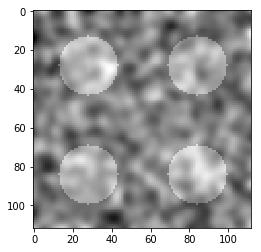

In [32]:
batch = sampler_AD(1)
img = batch[0]
print(img[0, 0, 1])
plt.imshow(img[:, :, 0], cmap='gray')
print(type(img[0, 0, 1]))

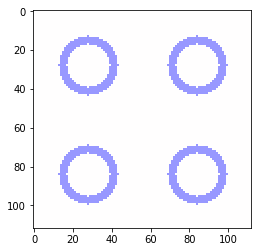

In [10]:
plt.imshow(img[:, :, 2], cmap='bwr', vmin=-1, vmax=1)

## Predict a difference map

4.0
100.0
(1, 112, 112, 3)


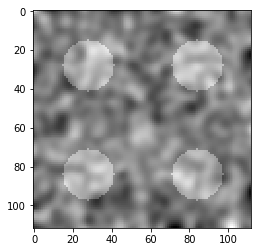

In [63]:
print(batch[0, 0, 0, 1])

fresh, noise = four_disks(
    effect_size=100.0,
    image_size=112,
    big_rad=13,
    big=[True, True, True, True]
)
unknown_disk = map_image_to_intensity_range(noise, -1, 1)
# batch[0, :, :, 1] = wrapper.data.normalize_delta(8)
batch[0, :, :, 0] = unknown_disk
masks = wrapper.vagan.predict_mask(batch)
mask = masks[0]
mask.shape
print(batch.shape)
plt.figure()
plt.imshow(unknown_disk, cmap='gray')

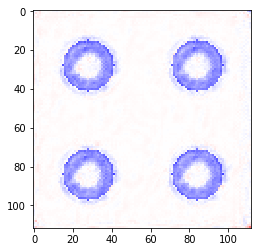

In [59]:
plt.imshow(mask[:, :, 0], cmap='bwr', vmin=-1, vmax=1)

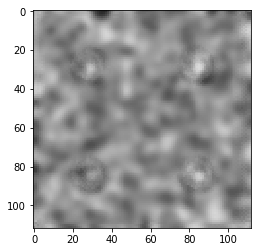

In [52]:
plt.imshow(img[:, :, 0] + mask[:, :, 0], cmap='gray', vmin=-1, vmax=1)

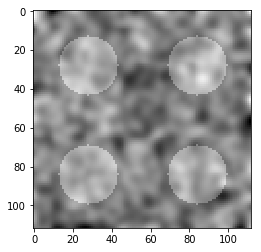

In [16]:
plt.imshow(img[:, :, 0], cmap='gray', vmin=-1, vmax=1)

In [34]:
print(np.min(img[:, :, 0]))
print(np.max(img[:, :, 0]))

-1.0
1.0


## Unknown t0

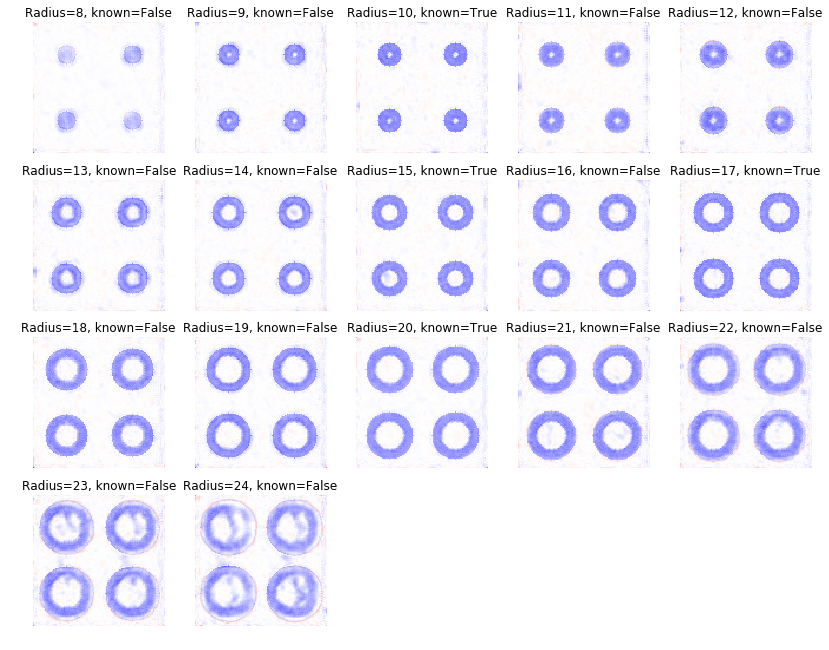

In [77]:
import math
new_radii = list(range(8, 25))
known = [10, 15, 17, 20]
known_delta = 6

masks = []
inps = []
for rad in new_radii:
    img, img_with_noise = four_disks(
        effect_size=100.0,
        image_size=112,
        big_rad=rad,
        big=[True, True, True, True]
    )
    inp = map_image_to_intensity_range(img_with_noise, -1, 1)
    inp = np.reshape(inp, (112, 112, 1))
    inp = np.concatenate((inp, inp * 0 + known_delta, inp), axis = -1)
    inps.append(inp)
    
batch = np.array(inps)
masks = wrapper.vagan.predict_mask(batch)
masks = np.squeeze(masks)

plt.figure(figsize=(14,14))

nrows = int(math.ceil(np.sqrt(batch.shape[0])))
ncols = nrows
for i, mask in enumerate(masks):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(mask, cmap='bwr', vmin=-1, vmax=1)
    plt.axis('off')
    radius = new_radii[i]
    plt.title("Radius={}, known={}".format(radius, radius in known))

## Unknown delta

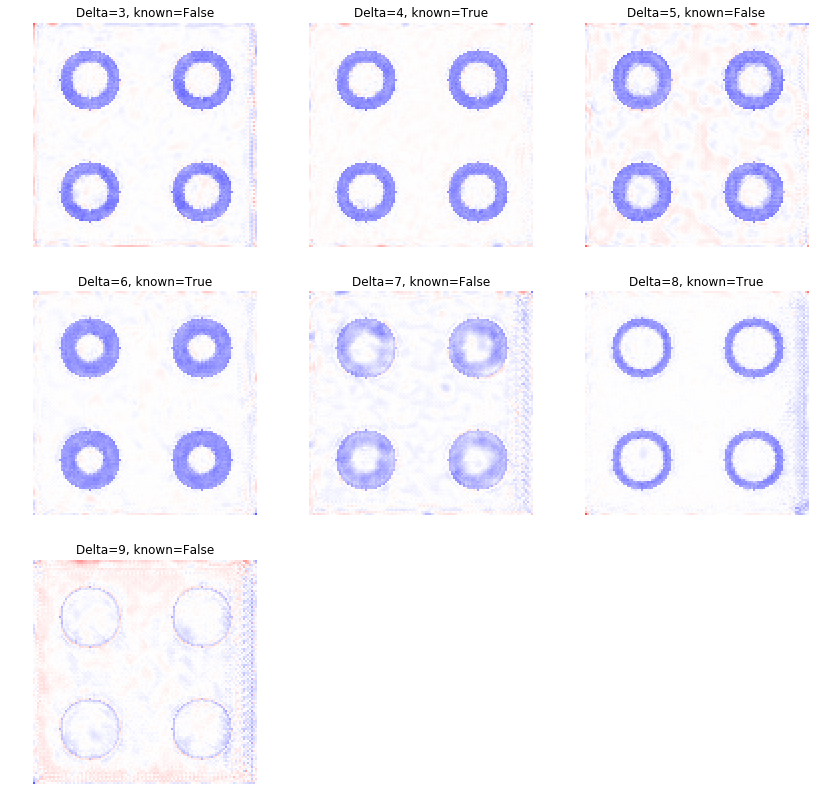

In [78]:
new_deltas = list(range(3, 10))
known = [4, 6, 8]
known_delta = 6

masks = []
inps = []
for delta in new_deltas:
    img, img_with_noise = four_disks(
        effect_size=100.0,
        image_size=112,
        big_rad=15,
        big=[True, True, True, True]
    )
    inp = map_image_to_intensity_range(img_with_noise, -1, 1)
    inp = np.reshape(inp, (112, 112, 1))
    inp = np.concatenate((inp, inp * 0 + delta, inp), axis = -1)
    inps.append(inp)
    
batch = np.array(inps)
masks = wrapper.vagan.predict_mask(batch)
masks = np.squeeze(masks)

plt.figure(figsize=(14,14))

nrows = int(math.ceil(np.sqrt(batch.shape[0])))
ncols = nrows
for i, mask in enumerate(masks):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(mask, cmap='bwr', vmin=-1, vmax=1)
    plt.axis('off')
    delta = new_deltas[i]
    plt.title("Delta={}, known={}".format(delta, delta in known))